## Radar plot for multimetric evaluation

Radar chart for multimetric comparison of models

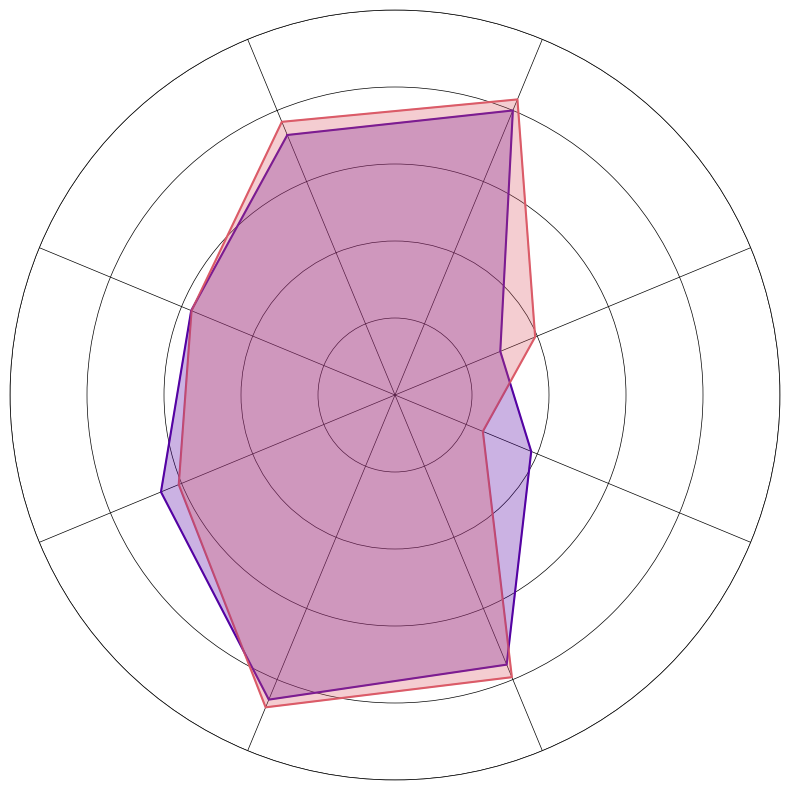

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")


def co2_transform(x, k):
    y = 100 * np.exp(-k * x)
    return y


def _plot_model(ax, r, color, tmax=360, phase_shift=0, kCO2=0.1, kkWh=0.1):
    # Transform the CO2 and kWh scale
    r[3] = co2_transform(r[3], kCO2)
    r[4] = co2_transform(r[4], kkWh)

    if tmax == 360:
        r_ = r + [r[0]]
        theta = list(np.linspace(phase_shift, tmax * np.pi / 180 + phase_shift, len(r_)))
        t_ = [t + phase_shift for t in theta]
        ax.plot(t_, r_, alpha=1, color=color)
        ax.fill(t_, r_, alpha=0.3, color=color, zorder=3)
        return t_[:-1]

    elif tmax <= 180:
        theta = list(np.linspace(0, tmax * np.pi / 180, len(r)))
        r_ = r + [0, r[0]]
        t_ = theta + [np.pi / 2, 0]
        ax.plot(t_, r_, alpha=1, color=color)
        ax.fill(t_, r_, alpha=0.3, color=color, zorder=3)
        return t_[:-2]
    else:
        raise NotImplementedError("Only supported values are tmax = 360 or 0<tmax<=180.")


# Define data
names = ["Top-1", "Regio", "Low MW", r"CO$_2$", "kWh" "High MW", "Stereo", "Top2"]

# Write here the results for each model
r_g2s = [73.1, 57.3, 65.8, 0.31, 5.54, 38.3, 29.6, 80.0]
r_s2s = [76.8, 57.2, 60.8, 0.26, 4.63, 24.7, 39.4, 83.1]


kco2 = 5e-1
kkwh = 5e-2

# Define plot params
tmax = 360  # degrees
ymax = 100

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, polar=True)


thetas = _plot_model(ax, r_g2s, "#5402A3", tmax, kCO2=kco2, kkWh=kkwh)
thetas = _plot_model(ax, r_s2s, "#DB5B68", tmax, kCO2=kco2, kkWh=kkwh)
# thetas = _plot_model(ax, r_nes, '#F48849', tmax, kCO2=kco2, kkWh=kkwh)


ax.set_thetamin(0)
ax.set_thetamax(tmax)
ax.set_ylim(0, 100)

ax.set_xticks(thetas)
ax.set_xticklabels([], zorder=10, horizontalalignment="center")


ax.tick_params(axis="x", which="both", pad=20, zorder=1, labelsize=15)

ax.set_theta_offset(np.pi / 8 * 5)
ax.set_rlabel_position(-45 / 2 + 3)
ax.tick_params(axis="y", which="both", labelsize=15, zorder=1)
# ax.set_yticks(np.arange(0,ymax+1, 20))
ax.set_yticklabels([])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.grid(axis="y", zorder=5)
# change grid color and all radar lines to black
ax.grid(color="black", linestyle="solid", linewidth=0.5, zorder=5)
ax.spines["polar"].set_color("black")
ax.spines["polar"].set_linewidth(0.5)

# plt.show()


# ax.set_xticklabels(names, horizontalalignment="center", verticalalignment='bottom')
fig.savefig("polar.svg", bbox_inches="tight")